Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.patheffects as path_effects

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

import cv2

import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Stop warning

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

Load the training and testing dataset

In [2]:
dataset_path = 'dataset'
train = pd.read_csv(os.path.join(dataset_path, 'sign_mnist_train.csv'))
test = pd.read_csv(os.path.join(dataset_path, 'sign_mnist_test.csv'))
labels = train['label'].values # Extract labels

Remove the label column and binarize the labels

In [3]:
train.drop('label', axis = 1, inplace = True)
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

Convert the data into 2d np array because it's the format Tensorflow uses

In [4]:
images = train.values
images = np.array([np.reshape(i, (28, 28, 1)) for i in images])

Split the data into test and train

In [5]:
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.3, random_state=420)

Define Hyperparameters

In [6]:
batch_size = 128
num_classes = 24
epochs = 10

Normalize the data to be between 0 and 1 and reshape them to be compatible with Tensorflow

In [7]:
x_train = x_train.values / 255
x_test = x_test.values / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Print a random image and its label

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


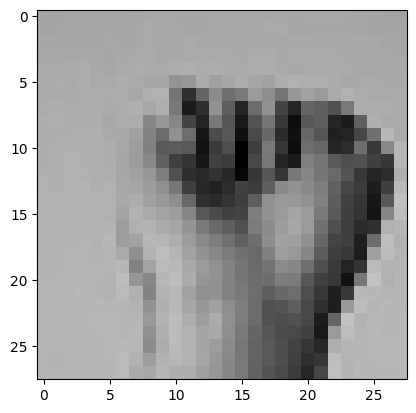

In [15]:
index = np.random.randint(0, len(images))
print(labels[index])
plt.imshow(images[index], cmap='gray', vmin=0, vmax=255)

Initalize the model

In [9]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation='softmax'))

Compile the model

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

Train the model

In [11]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size = batch_size)

Epoch 1/10
151/151 [==============================] - 10s 66ms/step - loss: 2.6232 - accuracy: 0.1878 - val_loss: 1.6149 - val_accuracy: 0.5189
Epoch 2/10
151/151 [==============================] - 9s 60ms/step - loss: 1.2494 - accuracy: 0.5810 - val_loss: 0.8576 - val_accuracy: 0.7208
Epoch 3/10
151/151 [==============================] - 9s 58ms/step - loss: 0.7536 - accuracy: 0.7435 - val_loss: 0.5227 - val_accuracy: 0.8402
Epoch 4/10
151/151 [==============================] - 9s 61ms/step - loss: 0.4777 - accuracy: 0.8420 - val_loss: 0.2843 - val_accuracy: 0.9160
Epoch 5/10
151/151 [==============================] - 10s 65ms/step - loss: 0.3346 - accuracy: 0.8895 - val_loss: 0.1998 - val_accuracy: 0.9491
Epoch 6/10
151/151 [==============================] - 9s 59ms/step - loss: 0.2377 - accuracy: 0.9222 - val_loss: 0.1765 - val_accuracy: 0.9455
Epoch 7/10
151/151 [==============================] - 9s 58ms/step - loss: 0.1688 - accuracy: 0.9480 - val_loss: 0.0784 - val_accuracy: 0.98

Showing the increase in accuracy as number of epochs increases

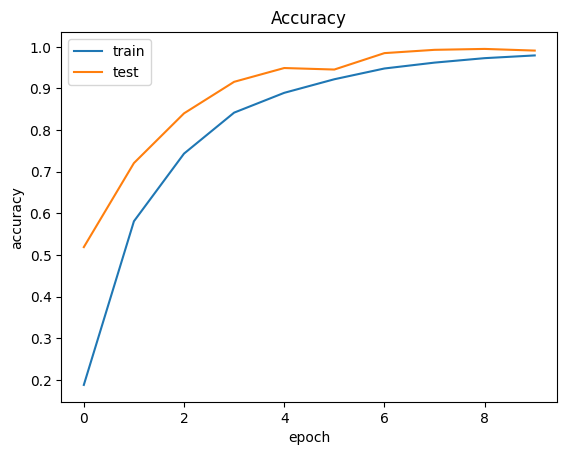

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.show()

Test the model on unseen data

In [13]:
test_labels = test['label']
test.drop('label', axis=1, inplace=True)
test_labels = label_binarizer.fit_transform(test_labels)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28, 1)) for i in test_images])
test_images = test_images / 255.0

y_pred = model.predict(test_images)

225/225 [==============================] - 1s 3ms/step


Check accuracy on unseen data

In [14]:
accuracy_score(test_labels, y_pred.round())

0.8680981595092024